## 数据规约方法

#### 介绍

本次实验中，我们将了解数据预处理中的第四项流程：数据规约。数据规约的思想很简单，那就是尝试通过对数据「压缩」来得到比利用全部数据解决甚至更好的效果。数据规约也是特征工程的一部分，常涉及到主成分分析、线性判别分析、相关系数等内容。

#### 知识点

* 主成分分析 
* 线性判别分析
* 皮尔逊相关系数
* 卡方检验
* 数据抽样

### 主成分分析（无标签数据降维）

主成分分析是多元线性统计里面的概念，它的英文是 Principal Components Analysis，简称 PCA。主成分分析旨在降低数据的维数，通过保留数据集中的主要成分来简化数据集。简化数据集在很多时候是非常必要的，因为复杂往往就意味着计算资源的大量消耗。通过对数据进行降维，我们就能在不较大影响结果的同时，减少模型学习时间。

主成分分析的数学基原理非常简单，通过对协方差矩阵进行特征分解，从而得出主成分（特征向量）与对应的权值（特征值）。然后剔除那些较小特征值（较小权值）对应的特征，从而达到降低数据维数的目的。

[<i class="fa fa-external-link-square" aria-hidden="true"> 主成分分析-维基百科</i>](https://zh.wikipedia.org/wiki/%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90)

PCA 最便捷的实现方式是通过 scikit-learn 完成，下面我们通过一个示例来学习。首先我们加载鸢尾花示例数据集。

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
%matplotlib inline

iris = load_iris()  # 加载原始数据
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)  # 处理为 DataFrame
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


你可以看到，该数据集包含有 4 列，这代表鸢尾花的 4 个特征。

此时，如果你想将上面的数据集绘制成数据点图（平面散点图），你知道是无法实现的。因为，散点图只能存在横纵坐标值，这里有 4 个特征。那么，此时就可以使用 PCA 对数据进行降维处理，由 4 个特征变为 2 个新特征之后，即可绘图。

这里介绍以下 `sklearn.decomposition.PCA` 方法中的几个参数：

*   `n_components=` 表示需要保留主成分（特征）的数量。
*   `copy=` 表示针对原始数据降维还是针对原始数据副本降维。当参数为 False 时，降维后的原始数据会发生改变，这里默认为 True。
*   `whiten=` 白化表示将特征之间的相关性降低，并使得每个特征具有相同的方差。
*   `svd_solver=` 表示奇异值分解 SVD 的方法。有 4 参数，分别是：`auto`, `full`, `arpack`, `randomized`。

官方文档 [<i class="fa fa-external-link-square" aria-hidden="true"> sklearn.decomposition.PCA</i>](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

PCA 类在实现时模仿了 scikit-learn 中的模型训练过程，故此需要使用 `fit` 方法完成降维过程，这里直接使用 `fit_transform` 返回降维结果。

In [2]:
from sklearn.decomposition import PCA

iris_pca = PCA(n_components=2).fit_transform(iris_df)  # PCA 降 2 维
iris_pca = pd.DataFrame(iris_pca, columns=['pca_x', 'pca_y'])  # 整理 DataFrame
iris_pca

,pca_x,pca_y
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925
5,-2.279897,0.747783
6,-2.820891,-0.082105
7,-2.626482,0.170405
8,-2.887959,-0.570798
9,-2.673845,-0.106692


如上所述，数据已经由 4 列变为 2 列，现在就可以可视化了。

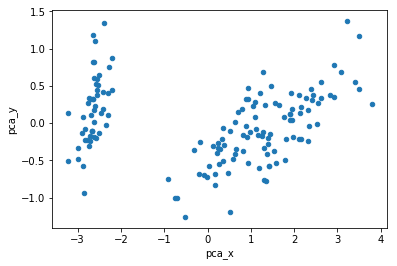

In [3]:
iris_pca.plot.scatter(x='pca_x', y='pca_y')  # 绘制数据点

实际上，可以通过 `iris.target` 查看每条数据对应的花的分类。所以，我们可以通过此标签对数据点着色。

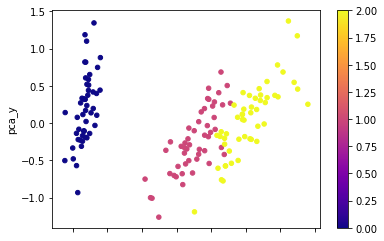

In [4]:
iris_pca.plot.scatter(x='pca_x', y='pca_y',
                      c=iris.target, cmap='plasma')  # 数据点着色

当然，我们上面是按照方便可视化的角度来讲解主成分分析。实际上，当我们的模型无需大量的特征输入时（大量特征也无助于改善模型性能时），通过 PCA 压缩特征的数量可以从某种意义上改善模型的运行速度，所以 PCA 被当作一种数据规约手段。

### 线性判别分析（有标签数据降维）

线性判别分析（Linear discriminant analysis，英文：LDA）同样可以用于特征降维。LDA 本来是一种分类模型，它试图找到两类物体或事件的特征的一个线性组合，以便能够特征化或区分它们。

LDA 和 PCA 的本质相似，都会将原始的样本映射到维度更低的样本空间中。不过，PCA 映射后的样本具有更大的发散性，而 LDA 映射后的样本具有更明显的类别区分（最大类间差异，最小类内差异）。

scikit-learn 同样提供了可以用于 LDA 处理的 API：`sklearn.discriminant_analysis.LinearDiscriminantAnalysis`，使用方法如下：

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris_lda = LinearDiscriminantAnalysis(
    n_components=2).fit_transform(iris_df, iris.target)  # lda 降 2 维

iris_lda = pd.DataFrame(iris_lda, columns=['lda_x', 'lda_y'])  # 整理 DataFrame
iris_lda

,lda_x,lda_y
0,-8.084953,0.328454
1,-7.147163,-0.755473
2,-7.511378,-0.238078
3,-6.837676,-0.642885
4,-8.157814,0.540639
5,-7.723631,1.482323
6,-7.235147,0.377154
7,-7.629745,0.016672
8,-6.582741,-0.987374
9,-7.368841,-0.913627


我们可以通过绘制子图，来对比 PCA 和 LDA 两种方法降维之后的数据分布：

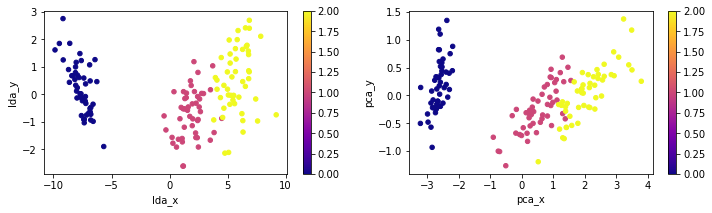

In [6]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 3))
iris_lda.plot.scatter(x='lda_x', y='lda_y', c=iris.target,
                      cmap='plasma', ax=axes[0])  # 数据点着色
iris_pca.plot.scatter(x='pca_x', y='pca_y', c=iris.target,
                      cmap='plasma', ax=axes[1])  # 数据点着色

你可以从上图看出二者的区别。PCA 和 LDA 是两种不同的降维方法，没有方法的好坏之说。一般情况下，PCA 会使用多一些，你可以看到 LDA 需要输入目标值，而 PCA 则无需这一点。

### 皮尔逊相关系数

主成分分析可以对特征数量进行压缩，其实我们还有一种方法是通过挑选特征达到特征压缩的目的。假设数据表中包含 10 个特征（10 列），那么我们是否可以通过某种评价指标挑选出最佳的 5 个特征用于建模呢？答案是可以的。

在统计学中，皮尔逊积矩相关系数（英语：Pearson product-moment correlation coefficient）用于度量两个变量 $X$ 和 $Y$ 之间的相关（线性相关），其值介于 -1 与 1 之间。在自然科学领域中，该系数广泛用于度量两个变量之间的相关程度。它是由卡尔·皮尔逊从弗朗西斯·高尔顿在 19 世纪 80 年代提出的一个相似却又稍有不同的想法演变而来。这个相关系数也称作「皮尔逊相关系数」。[<i class="fa fa-external-link-square" aria-hidden="true"> 维基百科</i>](https://zh.wikipedia.org/wiki/%E7%9A%AE%E5%B0%94%E9%80%8A%E7%A7%AF%E7%9F%A9%E7%9B%B8%E5%85%B3%E7%B3%BB%E6%95%B0)

两个变量之间的皮尔逊相关系数定义为两个变量之间的协方差和标准差的商：

$${\displaystyle \rho _{X,Y}={\mathrm {cov} (X,Y) \over \sigma _{X}\sigma _{Y}}={E[(X-\mu _{X})(Y-\mu _{Y})] \over \sigma _{X}\sigma _{Y}}}$$

有了皮尔逊相关性系数，我们就可以评估不同特征与目标值直接的相关性，从而剔除那些相关性弱的特征，达到特征压缩的目的。接下来，我们使用 SciPy 提供的皮尔逊相关性系数计算方法 `scipy.stats.pearsonr` 来求解 `iris` 示例数据集各特征与目标值之间的相关系数。

官方文档 [<i class="fa fa-external-link-square" aria-hidden="true"> scipy.stats.pearsonr</i>](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html)

In [7]:
from scipy.stats import pearsonr

for i in range(4):
    p = pearsonr(iris_df.iloc[:, i], iris.target)[0]  # 求解每个特征与目标值的相关性
    print("{}: {}".format(iris.feature_names[i], p))  # 输出

sepal length (cm): 0.7825612318100814
sepal width (cm): -0.4194462002600275
petal length (cm): 0.9490425448523336
petal width (cm): 0.9564638238016173


上文说过，皮尔逊相关系数介于 -1 与 1 之间，越接近 1 则代表越正相关。所以，iris 示例数据集中与目标值更为相关的特征是 `sepal length`，`petal length` 和 `petal width`。

这里再补充一种计算数据集特征和目标之间皮尔逊相关性系数的方法，你可以直接在 DataFrame 后添加 `corr()` 属性获得。更为常用的是通过 Seaborn 可视化工具绘制热图。

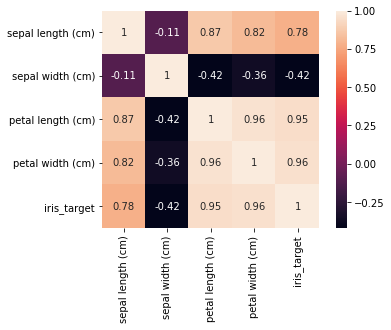

In [8]:
import seaborn as sns


# 得到特征和目标拼合后的 DataFrame
iris_full_df = pd.concat([pd.DataFrame(iris.data, columns=iris.feature_names),
                          pd.DataFrame(iris.target, columns=['iris_target'])], axis=1)

sns.heatmap(iris_full_df.corr(), square=True, annot=True)  # corr() 函数计算皮尔逊相关系数

区别于手动计算各特征和目标之间的相关系数，上方热图还计算了特征之间的相关系数。观察热图最后一行，不难发现与我们通过 `scipy.stats.pearsonr` 计算的结果一致。

### 卡方检验

在 1900 年，皮尔逊发表了著名的关于 $\chi ^{2}$ 检验（卡方检验 Chi-Squared Test）的文章，该文章被认为是现代统计学的基石之一。简单来讲，实际观测值与理论推断值之间的偏离程度就决定卡方值的大小。若卡方值越小，代表偏差越小，越趋于符合。

所以，借助于卡方检验，我们同样可以仿照皮尔逊相关系数计算特征与目标之间的卡方值，从而评估二者之间的偏差程度。最终，我们通过保留偏差小的特征来达到减小特征数量的目的。

scikit-learn 提供了 `SelectKBest` 可以返回 `k` 个最佳特征，不过我们需要使用 `sklearn.feature_selection.chi2` 来计算卡方值。接下来，同样使用 `iris` 数据集来进行卡方检验。

官方文档 [<i class="fa fa-external-link-square" aria-hidden="true"> sklearn.feature_selection.chi2</i>](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2) 和 [<i class="fa fa-external-link-square" aria-hidden="true"> sklearn.feature_selection.SelectKBest</i>](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.SelectKBest)

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

kafang = SelectKBest(score_func=chi2, k=3)  # 保留 3 个最佳特征，并使用卡方检验
kafang.fit_transform(iris_df, iris.target)

/home/x/anaconda3/lib/python3.6/site-packages/sklearn/utils/__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1],
       [5.4, 1.5, 0.2],
       [4.8, 1.6, 0.2],
       [4.8, 1.4, 0.1],
       [4.3, 1.1, 0.1],
       [5.8, 1.2, 0.2],
       [5.7, 1.5, 0.4],
       [5.4, 1.3, 0.4],
       [5.1, 1.4, 0.3],
       [5.7, 1.7, 0.3],
       [5.1, 1.5, 0.3],
       [5.4, 1.7, 0.2],
       [5.1, 1.5, 0.4],
       [4.6, 1. , 0.2],
       [5.1, 1.7, 0.5],
       [4.8, 1.9, 0.2],
       [5. , 1.6, 0.2],
       [5. , 1.6, 0.4],
       [5.2, 1.5, 0.2],
       [5.2, 1.4, 0.2],
       [4.7, 1.6, 0.2],
       [4.8, 1.6, 0.2],
       [5.4, 1.5, 0.4],
       [5.2, 1.5, 0.1],
       [5.5, 1.4, 0.2],
       [4.9, 1.5, 0.1],
       [5. , 1.2, 0.2],
       [5.5, 1.3, 0.2],
       [4.9, 1.5, 0.1],
       [4.4, 1.3, 0.2],
       [5.1, 1.5, 0.2],
       [5. , 1.3, 0.3],
       [4.5, 1.3

`transformer` 输出了需要保留的最佳特征，与 `iris_df` 对比后你会发现，它保留了与皮尔逊相关系数结果一致的 `sepal length`，`petal length` 和 `petal width` 特征。你可以通过 `scores_` 属性输出卡方值的计算结果。

In [10]:
kafang.scores_  # 各特征与目标值之间的卡方值

array([ 10.81782088,   3.59449902, 116.16984746,  67.24482759])

这里要补充一点是，实际使用中卡方检验和皮尔逊相关系数的评估结果并不会都像 iris 数据集上一致，往往会得到不同的结果。这其实也就反映出选取最好的特征往往取决于评估指标，而没有唯一答案。

上面我们介绍依据皮尔逊相关系数和卡方检验进行特征选择的方法在特征工程中又被归类于 Filter 过滤法，它主要侧重于单个特征跟目标变量的相关性。这种方法的优点在于计算速度快，且有较高的鲁棒性。但是，Filter 方法的缺点在于不考虑特征之间的相关性。因为，有可能某一个特征自身不具备代表性，但是它和某些其它特征组合起来会使得模型会得到不错的效果。这一点就是 Filter 方法无法考虑到的了。

除此之外，从特征工程的角度来讲，还可以使用 Wrapper 封装法和 Embeded 集成方法来完成特征选择。这两类方法会更好地考虑特征与特征之间的关联性，但由于 Wrapper 和 Embeded 本身就需要用到算法建模，在此就不进行介绍了。等学习完后面建模的内容再了解就行。

### 数据抽样

数据抽样也是一种有效的数据规约手段，与上面介绍的方法不一致的地方在于，数据抽样是通过减少样本而非特征的数据来达到数据规约的效果。数据抽样通过从原始数据集中随机采集样本构成子集，从而降低数据规模。

最简单的抽样当然就是「随机抽样」了，我们可以生成一组随机索引，然后从数据集中抽取到相应的数据。这里，我们使用上方的 iris 数据集来完成。

In [11]:
import numpy as np

chosen_idx = np.random.choice(
    len(iris_df), replace=False, size=10)  # 从 iris 数据集中抽取 10 条数据
iris_df.iloc[chosen_idx]  # 抽取相应索引的数据

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
27,5.2,3.5,1.5,0.2
108,6.7,2.5,5.8,1.8
138,6.0,3.0,4.8,1.8
71,6.1,2.8,4.0,1.3
141,6.9,3.1,5.1,2.3
86,6.7,3.1,4.7,1.5
18,5.7,3.8,1.7,0.3
62,6.0,2.2,4.0,1.0
59,5.2,2.7,3.9,1.4
127,6.1,3.0,4.9,1.8


除此之外，你还可以直接使用 Pandas 提供的 `sample` 方法完成随机抽样过程，其中只需要指定抽样数目即可。

官方文档 [<i class="fa fa-external-link-square" aria-hidden="true"> pandas.DataFrame.sample</i>](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.sample.html)

In [12]:
iris_df.sample(n=10)  # 从数据集中随机抽取 10 条

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
88,5.6,3.0,4.1,1.3
136,6.3,3.4,5.6,2.4
134,6.1,2.6,5.6,1.4
112,6.8,3.0,5.5,2.1
133,6.3,2.8,5.1,1.5
25,5.0,3.0,1.6,0.2
32,5.2,4.1,1.5,0.1
119,6.0,2.2,5.0,1.5
65,6.7,3.1,4.4,1.4
17,5.1,3.5,1.4,0.3


数据抽样虽然在这里被归入数据规约，但实际上更多用于前面的环节中。一般情况下，我们会从清洁后的数据中抽样，使用抽样数据来完成特征工程和建模，以探索方法实施的可能性。最终再使用完整数据集进行建模分析。

### 实验总结

本次实验主要了解了数据规约中的主成分分析、数据抽样、数据检验等方法，这三类方法中数据分析中非常常用，也是特征工程中特征选择的相关方法。